<a href="https://colab.research.google.com/github/tomonari-masada/course-nlp2020/blob/master/04_PyTorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04 PyTorch入門（１）
参考資料: 
* PyTorch公式のチュートリアル https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
* 《20天吃掉那只Pytorch》 https://github.com/lyhue1991/eat_pytorch_in_20_days

## 04-01 テンソル

In [1]:
import numpy as np
import torch

### テンソルの作り方

In [2]:
# 不定な値を要素とするテンソルを作る
x = torch.empty(5, 3) 
print(x)

tensor([[3.0677e-36, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 1.1421e-36]])


In [3]:
# 一様乱数を要素とするテンソルを作る
x = torch.rand(5, 3)
print(x)

tensor([[0.3499, 0.2314, 0.4814],
        [0.0733, 0.2534, 0.9101],
        [0.1650, 0.9437, 0.3384],
        [0.3491, 0.8566, 0.8620],
        [0.1621, 0.1420, 0.4849]])


In [4]:
# リストからテンソルを作る
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [5]:
# 既存のテンソルから新たにテンソルを作る
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

# 既存のテンソルから形状を引き継いで新たにテンソルを作る（要素のデータ型も変更する）
x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.4869, -0.9151, -1.6788],
        [-0.7692, -0.1921,  0.1423],
        [-0.8162,  0.3959,  1.1952],
        [-1.1941,  0.2544,  0.4273],
        [-0.3306, -1.7063, -2.0039]])


In [6]:
print(x.size())

torch.Size([5, 3])


### テンソルの要素のデータ型いろいろ

In [7]:
i = torch.tensor(1)
print(i, i.dtype)
x = torch.tensor(2.0)
print(x, x.dtype)
b = torch.tensor(True)
print(b, b.dtype)

tensor(1) torch.int64
tensor(2.) torch.float32
tensor(True) torch.bool


### 特定の型のテンソルとして初期化(1)

In [8]:
i = torch.tensor(1, dtype=torch.int32)
print(i, i.dtype)
x = torch.tensor(2.0, dtype=torch.float)
print(x, x.dtype)
z = torch.tensor(2.0, dtype=torch.double)
print(z, z.dtype)

tensor(1, dtype=torch.int32) torch.int32
tensor(2.) torch.float32
tensor(2., dtype=torch.float64) torch.float64


### 特定の型のテンソルとして初期化(2)

In [9]:
i = torch.IntTensor([1, 2, 3])
print(i, i.dtype)
x = torch.FloatTensor(np.array([2.0, -4.0]))
print(x, x.dtype)
b = torch.BoolTensor(np.array([1, 0, 2, 0]))
print(b, b.dtype)

tensor([1, 2, 3], dtype=torch.int32) torch.int32
tensor([ 2., -4.]) torch.float32
tensor([ True, False,  True, False]) torch.bool


### 要素の型の変更

In [10]:
i = torch.tensor(1)
print(i, i.dtype)
x = i.float()
print(x, x.dtype)
y = i.type(torch.float)
print(y, y.dtype)
z = i.type_as(x)
print(z, z.dtype)

tensor(1) torch.int64
tensor(1.) torch.float32
tensor(1.) torch.float32
tensor(1.) torch.float32


### スカラーとベクトル

In [11]:
scalar = torch.tensor(1.0)
print(scalar)
print(scalar.dim())
print()
vector = torch.tensor([1.0, 2.0, 3.0, 4.0])
print(vector)
print(vector.dim())
print(vector.shape)
print()
vector = torch.tensor([4.0])
print(vector)
print(vector.dim())
print(vector.shape)

tensor(1.)
0

tensor([1., 2., 3., 4.])
1
torch.Size([4])

tensor([4.])
1
torch.Size([1])


In [12]:
# 要素がひとつのテンソルから、その要素を単なる数値として取り出す
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.5847])
0.5847008228302002


### 行列

In [13]:
matrix = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
print(matrix)
print(matrix.dim())
print(matrix.shape)
print(matrix[1, 1])

tensor([[1., 2.],
        [3., 4.]])
2
torch.Size([2, 2])
tensor(4.)


### テンソル

In [14]:
tensor3 = torch.tensor([[[1.0, 2.0], [3.0, 4.0]], [[5.0, 6.0], [7.0, 8.0]]])
print(tensor3)
print(tensor3.dim())
print(tensor3.shape)
print(tensor3[1, 1, 1])

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
3
torch.Size([2, 2, 2])
tensor(8.)


In [15]:
tensor4 = torch.tensor([[[[1.0, 1.0], [2.0, 2.0]], [[3.0, 3.0], [4.0, 4.0]]],
                        [[[5.0, 5.0], [6.0, 6.0]], [[7.0, 7.0], [8.0, 8.0]]]])
print(tensor4)
print(tensor4.dim())
print(tensor4.shape)
print(tensor4[1, 1, 1, 1])

tensor([[[[1., 1.],
          [2., 2.]],

         [[3., 3.],
          [4., 4.]]],


        [[[5., 5.],
          [6., 6.]],

         [[7., 7.],
          [8., 8.]]]])
4
torch.Size([2, 2, 2, 2])
tensor(8.)


In [16]:
tensor3 = torch.tensor([[[1.0, 2.0], [3.0, 4.0]], [[5.0, 6.0], [7.0, 8.0]]])
print(tensor3)
print(tensor3.dim())
print(tensor3.shape)
print(tensor3.size())

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
3
torch.Size([2, 2, 2])
torch.Size([2, 2, 2])


### view()

In [17]:
vector = torch.arange(0, 12)
print(vector)
print(vector.shape)

matrix34 = vector.view(3, 4)
print(matrix34)
print(matrix34.shape)

matrix43 = vector.view(4, -1)
print(matrix43)
print(matrix43.shape)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
torch.Size([4, 3])


### reshape()

In [18]:
matrix26 = torch.arange(0, 12).view(2, 6)
print(matrix26)
print(matrix26.shape)

matrix62 = matrix26.t()
print(matrix62.is_contiguous())
print(matrix62.contiguous().is_contiguous())

# matrix34 = matrix62.view(3, 4) # これはエラーになる
matrix34 = matrix62.reshape(3, 4)
print(matrix34)

matrix34 = matrix62.contiguous().view(3, 4) # これはエラーにならない
print(matrix34)

matrix34 = matrix62.reshape(-1, 4)
print(matrix34)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
torch.Size([2, 6])
False
True
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])


In [19]:
vector = torch.arange(0, 12)
matrix62 = vector.view(6, 2)
matrix34 = matrix62.view(3, 4) # 問：　これがエラーにならないのはなぜか。
print(matrix34)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### 演算

In [20]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

tensor([[1.3715, 1.2321, 1.1265],
        [0.1919, 1.4122, 1.2826],
        [0.0825, 1.1454, 1.0159],
        [0.8498, 0.7060, 0.6691],
        [1.2295, 0.4902, 1.1424]])


In [21]:
print(torch.add(x, y))

tensor([[1.3715, 1.2321, 1.1265],
        [0.1919, 1.4122, 1.2826],
        [0.0825, 1.1454, 1.0159],
        [0.8498, 0.7060, 0.6691],
        [1.2295, 0.4902, 1.1424]])


In [22]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[1.3715, 1.2321, 1.1265],
        [0.1919, 1.4122, 1.2826],
        [0.0825, 1.1454, 1.0159],
        [0.8498, 0.7060, 0.6691],
        [1.2295, 0.4902, 1.1424]])


### NumPyのndarrayからfrom_numpy()でPyTorchのテンソルを作る

In [23]:
arr = np.zeros(3)
tensor = torch.from_numpy(arr)
print(arr)
print(tensor)

# 元のndarrayを変更するとテンソルも変更されることに注意！
np.add(arr, 1, out=arr)
print(arr)
print(tensor)

[0. 0. 0.]
tensor([0., 0., 0.], dtype=torch.float64)
[1. 1. 1.]
tensor([1., 1., 1.], dtype=torch.float64)


In [24]:
tensor = torch.zeros(3)
arr = tensor.numpy()
print(tensor)
print(arr)

# テンソルのほうを変更しても元のndarrayが変更されることに注意！
tensor.add_(1)
print(tensor)
print(arr)

tensor([0., 0., 0.])
[0. 0. 0.]
tensor([1., 1., 1.])
[1. 1. 1.]


### clone()によるテンソルの複製

In [25]:
tensor = torch.zeros(3)

arr = tensor.clone().numpy()
print(tensor)
print(arr)

tensor.add_(1) #给 tensor增加1，arr不再随之改变
print(tensor)
print(arr)

tensor([0., 0., 0.])
[0. 0. 0.]
tensor([1., 1., 1.])
[0. 0. 0.]


### インデクシング
* NumPyと同じ。

In [26]:
x = torch.rand(5, 3)
print(x)
print(x[:, 1])

tensor([[0.8639, 0.5431, 0.5329],
        [0.7789, 0.9056, 0.9509],
        [0.3299, 0.3916, 0.3747],
        [0.5298, 0.8740, 0.7453],
        [0.0633, 0.7050, 0.5082]])
tensor([0.5431, 0.9056, 0.3916, 0.8740, 0.7050])


### item()とtolist()によるPythonの組み込み型への変換

In [27]:
scalar = torch.tensor(1.0)
s = scalar.item()
print(s)
print(type(s))

tensor = torch.rand(2,2)
t = tensor.tolist()
print(t)
print(type(t))

1.0
<class 'float'>
[[0.8517070412635803, 0.017231285572052002], [0.819572389125824, 0.7321147918701172]]
<class 'list'>


### GPUへテンソルを持っていく
* ランタイムのタイプをGPUへ変更してから下のセルを実行する。

In [28]:
import torch

x = torch.rand(5, 3)

if torch.cuda.is_available():
  device = torch.device("cuda")          # a CUDA device object
  y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
  x = x.to(device)                       # or just use strings ``.to("cuda")``
  z = x + y
  print(z)
  print(z.to("cpu", torch.double))

tensor([[1.7343, 1.4868, 1.9938],
        [1.1426, 1.9887, 1.4803],
        [1.6603, 1.2090, 1.5921],
        [1.5587, 1.6400, 1.0286],
        [1.9127, 1.5062, 1.3475]], device='cuda:0')
tensor([[1.7343, 1.4868, 1.9938],
        [1.1426, 1.9887, 1.4803],
        [1.6603, 1.2090, 1.5921],
        [1.5587, 1.6400, 1.0286],
        [1.9127, 1.5062, 1.3475]], dtype=torch.float64)


## 04-02 自動微分

In [29]:
import numpy as np 
import torch

### それに関して微分をする変数を作る
* requires_gradをTrueにする

In [30]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [31]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


### 計算グラフ

In [32]:
print(y.grad_fn)

In [33]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [34]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


### バックプロパゲーションの実行

In [35]:
out.backward()

### 微分係数

In [36]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


### 計算グラフを作らせない

In [37]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [38]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


In [39]:
# f(x) = a*x**2 + b*x + cの、x=2におけるxに関する微分係数を求める

x = torch.tensor(2.0, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(1.0)

y = a * torch.pow(x, 2) + b * x + c

y.backward()
print(x.grad)

tensor(2.)


### 計算グラフの可視化

In [40]:
!pip install torchviz

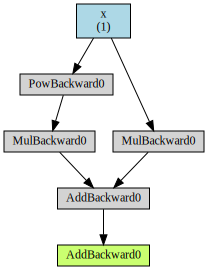

In [41]:
from torchviz import make_dot

x = torch.tensor([2.0], requires_grad=True)
a = torch.tensor([1.0])
b = torch.tensor([-2.0])
c = torch.tensor([1.0])

y = a * torch.pow(x, 2) + b * x + c
make_dot(y, params={'x':x})

### autograd()を使った高階微分
* 第一引数は微分される関数
* 第二引数はそれに関して微分する変数
* create_graphをTrueにすると計算グラフが作られるので、高階微分を計算できるようになる。

In [42]:
x = torch.tensor(0.0, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(1.0)
d = torch.tensor(5.0)
y = a * torch.pow(x, 3) + b * torch.pow(x, 2) + c * x + d

dy_dx = torch.autograd.grad(y, x, create_graph=True)[0]
print(dy_dx.data)

dy2_dx2 = torch.autograd.grad(dy_dx, x)[0]
print(dy2_dx2.data)

tensor(1.)
tensor(-4.)


### 多変数関数の偏微分とヘシアン

In [43]:
def func(x1, x2):
  return (x1 + 3 * x2) ** 2

x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)
y = func(x1, x2)

dy_dx1, dy_dx2 = torch.autograd.grad(outputs=y, inputs=[x1, x2], create_graph=True)
print(dy_dx1.data, dy_dx2.data)
dy_dx1dx1, dy_dx1dx2 = torch.autograd.grad(outputs=dy_dx1, inputs=[x1, x2], retain_graph=True)
print(dy_dx1dx1.data, dy_dx1dx2.data)
dy_dx2dx1, dy_dx2dx2 = torch.autograd.grad(outputs=dy_dx2, inputs=[x1, x2])
print(dy_dx2dx1.data, dy_dx2dx2.data)

print(torch.autograd.functional.hessian(func, inputs=(x1, x2)))

tensor(14.) tensor(42.)
tensor(2.) tensor(6.)
tensor(6.) tensor(18.)
((tensor(2.), tensor(6.)), (tensor(6.), tensor(18.)))


## 04-03 自動微分を使った制約なし最適化

In [44]:
# f(x) = a * x ** 2 + b * x + c
def f(x, a=1.0, b=-2.0, c=1.0):
  return a * torch.pow(x, 2) + b * x + c

x = torch.tensor(10.0, requires_grad=True)
optimizer = torch.optim.SGD(params=[x], lr=0.1)

for i in range(1, 101):
  optimizer.zero_grad()
  y = f(x)
  y.backward()
  optimizer.step()
  if i % 5 == 0:
    print(f'iter {i} : f(x) = {y.data:.6f}, x = {x.data:.6f}')

iter 5 : f(x) = 13.589545, x = 3.949120
iter 10 : f(x) = 1.459167, x = 1.966368
iter 15 : f(x) = 0.156677, x = 1.316659
iter 20 : f(x) = 0.016823, x = 1.103763
iter 25 : f(x) = 0.001806, x = 1.034001
iter 30 : f(x) = 0.000194, x = 1.011142
iter 35 : f(x) = 0.000021, x = 1.003651
iter 40 : f(x) = 0.000002, x = 1.001196
iter 45 : f(x) = 0.000000, x = 1.000392
iter 50 : f(x) = 0.000000, x = 1.000128
iter 55 : f(x) = 0.000000, x = 1.000042
iter 60 : f(x) = 0.000000, x = 1.000014
iter 65 : f(x) = 0.000000, x = 1.000005
iter 70 : f(x) = 0.000000, x = 1.000001
iter 75 : f(x) = 0.000000, x = 1.000000
iter 80 : f(x) = 0.000000, x = 1.000000
iter 85 : f(x) = 0.000000, x = 1.000000
iter 90 : f(x) = 0.000000, x = 1.000000
iter 95 : f(x) = 0.000000, x = 1.000000
iter 100 : f(x) = 0.000000, x = 1.000000


# 課題4
* 関数$f(x_1,x_2)=x_1^2+x_2^2$の最小値と、$f(x_1,x_2)$がその最小値をとるときの$x_1$と$x_2$の値を、PyTorchの自動微分を使って求めよう。